### Import all the necessary Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases # Encoding library

# The matplotlib plots will appear directly below the cell from where the plot function is called
%matplotlib inline

## Read in the csv files and remove duplicates

In [51]:
# Searching through the encodings that work

# Creating a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful cp1255
successful cp273
successful latin_1
successful mac_cyrillic
successful hp_roman8
successful iso8859_16
successful iso8859_4
successful cp858
successful mac_roman
successful cp1256
successful cp866
successful cp1251
successful iso8859_9
successful gb18030
successful iso8859_5
successful ptcp154
successful iso8859_7
successful mbcs
successful iso8859_3
successful utf_16_be
successful cp862
successful gbk
successful cp857
successful cp1140
successful mac_latin2
successful iso8859_8
successful cp850
successful cp863
successful iso8859_14
successful iso8859_6
successful iso8859_10
successful iso8859_15
successful cp1253
successful cp1257
successful cp437
successful koi8_r
successful cp1258
successful cp775
successful cp1026
successful cp949
successful cp932
successful cp1125
successful iso8859_11
successful mac_greek
successful cp1250
successful kz1048
successful cp037
successful cp500
successful mac_iceland
successful cp852
successful cp865
successful utf_16_le
successful

In [52]:
# Loading the dataset and using the timestamp as a date-time index
crime = pd.read_csv("crime.csv", encoding="ISO-8859-11")

In [53]:
crime.head() # Checking how the dataset looks like

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [54]:
crime.shape # Checking the shape of the data. (rows, columns)

(319073, 17)

In [55]:
crime.duplicated().sum() # Count of the duplicate rows

23

In [56]:
crime.drop_duplicates(inplace=True) # Dropping the duplicate rows

In [57]:
crime.shape # Checking the shape again to see if dropping the duplicate rows was performed

(319050, 17)

## Dataset Exploration

In [58]:
crime.head() # Another check of the head of the dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [59]:
crime.tail() # Checking the end of the dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [60]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [61]:
crime.info() # Information summary on the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [62]:
# Converting the data type from object to date-time for the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [63]:
# Checking if the function was carried out
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [64]:
# Extracting date-time information from the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [65]:
crime.OCCURRED_ON_DATE.dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [66]:
crime.OCCURRED_ON_DATE.dt.isocalendar().week

0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: week, Length: 319050, dtype: UInt32

In [67]:
crime.OCCURRED_ON_DATE.dt.hour

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [68]:
crime.OCCURRED_ON_DATE.dt.minute

0          0
1          0
2         27
3         16
4          5
          ..
319068    25
319069    38
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [69]:
crime.describe() # Summary information on the numeric columns

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [70]:
crime.describe(include='object') # Summary information on the non-numeric columns

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [71]:
# Checking for columns with missing values
crime.columns[np.sum(crime.isnull()) != 0]

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [72]:
# Checking for the number of missing values in each column
print('Missing values in each column \n')
crime[crime.columns].isnull().sum()

Missing values in each column 



INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318031
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19998
Long                    19998
Location                    0
dtype: int64

In [73]:
# Checking for columns with no missing values
crime.columns[np.sum(crime.isnull()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [74]:
# Checking for the number of unique values in each column
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


## Exploratory Questions

In [75]:
# Q1. What are the most common crimes in terms of offence group?
crime.OFFENSE_CODE_GROUP.value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

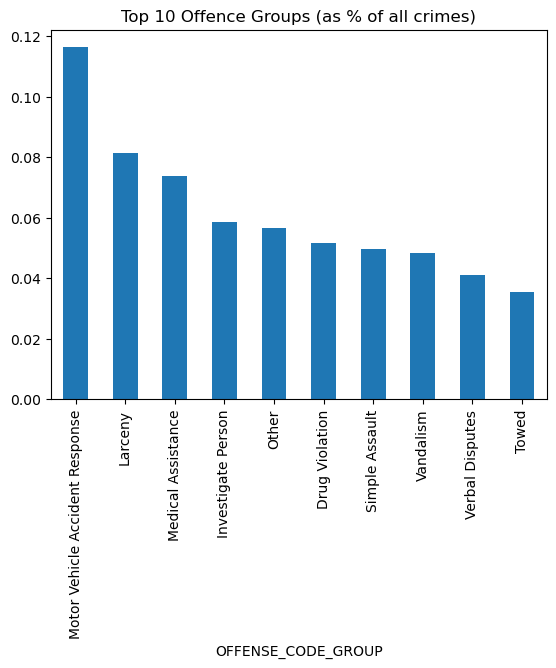

In [80]:
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(offense_group_vals / crime.shape[0])

# Plotting a bar chart of the Top 10 offence groups
(offense_group_vals / crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offence Groups (as % of all crimes)');

In [81]:
# Q2. What are the least common offence groups?
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

In [82]:
# Q3. What are the most common offence descriptions?
crime.OFFENSE_DESCRIPTION.value_counts()

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
KILLING OF FELON BY POLICE                         1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON         1
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: count, Length: 244, dtype: int64

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: count, dtype: float64

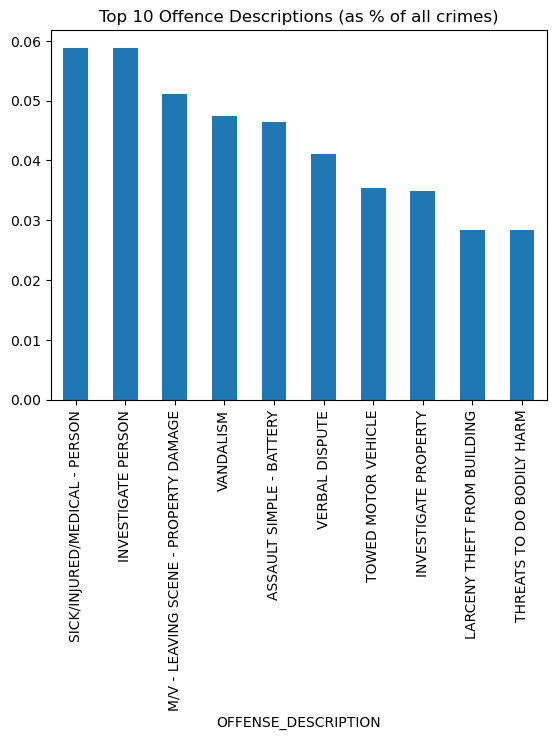

In [83]:
# plotting a bar chart of the Top 10 offence descriptions as a % of total crimes

offense_description_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_description_vals / crime.shape[0])

(offense_description_vals / crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offence Descriptions (as % of all crimes)');

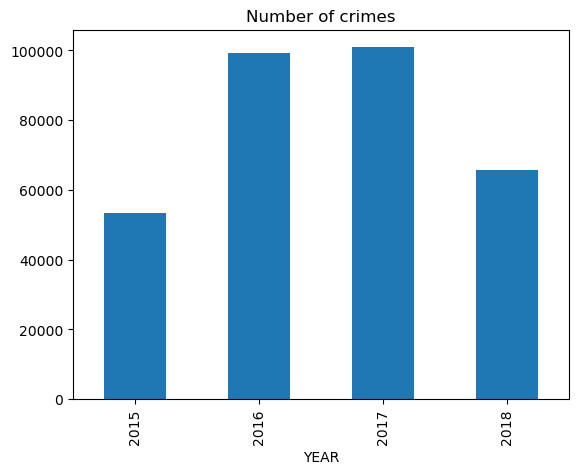

In [84]:
# Q4. In which year were the most crimes committed?
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title('Number of crimes');

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

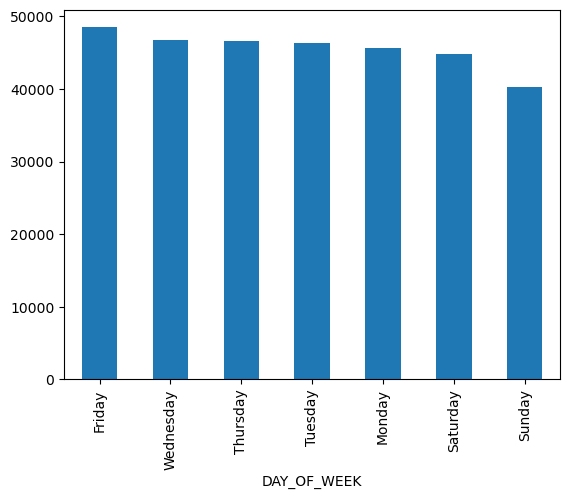

In [85]:
# Q5. Are there more crimes committed on specific days?

display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False));

crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar');

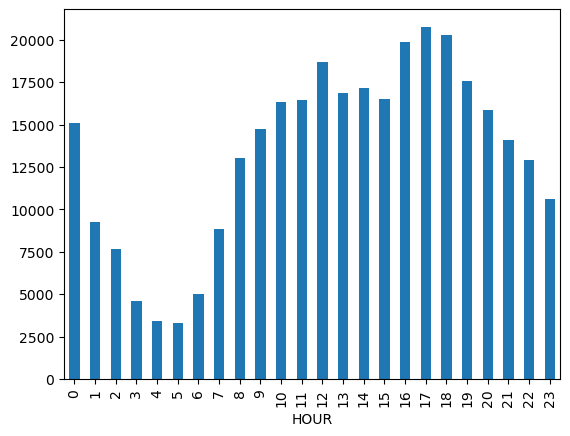

In [86]:
#Q6. Are there more crimes during specific hours?
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar');

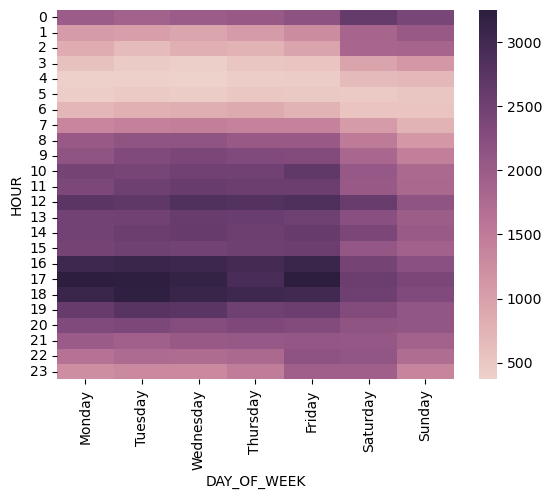

In [87]:
#Q7. On what days and during which hours are the most crimes committed?
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_and_hour = week_and_hour[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True));

In [88]:
# Q8. In which months were the number of crimes below average? 
# When the value is less than the average crime per month, highlighted in purple

avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.map(style_negative, props='color:purple;')\
              .map(lambda v: 'opacity: 50%;' if (v < 0.3) and (v > -0.3) else None)
s2

The average number of crimes is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [89]:
# Q9. In which months on average did the most crimes occur?
# Used apply method to highlight the maximum in a column in dark_red

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkred', axis=0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


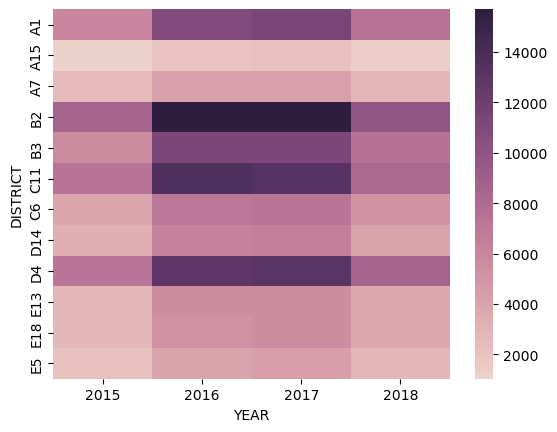

In [93]:
# Q10. In which districts were the most crimes committed yearly? 
district_and_year = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()
sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True));

In [91]:
# When the value is less than the average crime per district per year, highlighted in orange

avg_crime_district = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The average crime per district per year is: " + str(avg_crime_district))

def style_negative(v, props=''):
    return props if v < avg_crime_district else None
s3 = district_and_year.style.map(style_negative, props='color:orange;')\
              .map(lambda v: 'opacity: 10%;' if (v < 0.3) and (v > -0.3) else None)
s3

The average crime per district per year is: 6610.104166666667


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


In [92]:
# Maximum value in each column highlighted with dark_red

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s3.apply(highlight_max, props='color:white;background-color:darkred', axis=0)

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601
